# Ejercicio 4 - Compute Stats.

### Import the packages needed

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np

## Parameters and Bar customization

#### Set-up parameters

In [4]:
INFERENCE_DATASET_PATH = './results/detection.csv'
GROUND_TRUTH_DATASET_PATH = './results/groundtruth.csv'
OUTPUT_PATH = './results/output_stats_from_jupyter'

####  Customize the Bar Plot *look-and-feel* and intervals

In [5]:
# Intervals to create the percentages groups
# (x, y, z) where:
# - x: is the starting value.
# - y: is the max value (excluded)
# - z: is the amount of values in the interval.
INTERVAL_PERCENTAGE = (0, 400, 100)
INTERVAL_COMPLEXITY = (0, 5, 1)

BAR_WIDTH = 0.9      # [0, inf] float value
BAR_OPACITY = 0.8    # [0-1] float.

# Values of colors can be a HEX value
BAR_EDGE_COLOR = 'black'
BAR_COLOR = 'red'
BAR_ERROR_COLOR = 'black'
BACKGROUND_COLOR = '#DDDDDD'

# boolean if True percentages will be in [0, 100]
# else stretch to the percentages value.
STRETCH = False

## Stats Computation

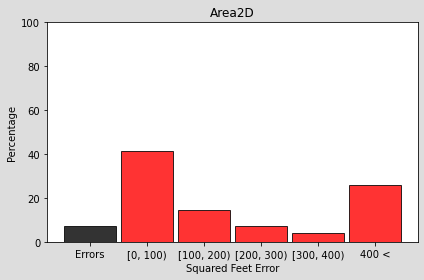

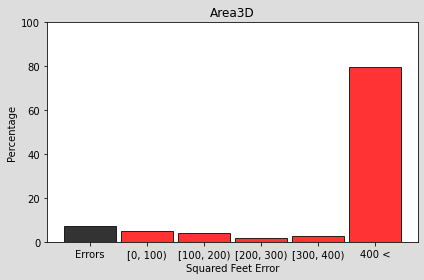

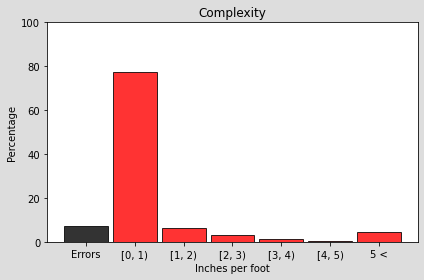

In [6]:
class Args:
    def __init__(self, inference, groundtruth, output_graphs):
        self.inference, self.groundtruth, self.output_graphs = inference, groundtruth, output_graphs

def plot_bar(result: np.array, intervals: np.array,
             title: str, x_label: str, y_label: str, stretch=True, output_folder=None):
    """
    Plot Graphs and save into a directory output.
    :param result:
    :param intervals: output of using the compute_intervals function
    :param title: Bar plot title (if output_folder is not None, will be used as filename)
    :param x_label: x-axis label
    :param y_label: y-axis label
    :param stretch: boolean if True percentages will be in [0, 100]
                    else the y-axis will be stretched to the percentages value.
    :param output_folder: folder where the image will be stored
    :return:
    """
    fig, _ = plt.subplots(facecolor=BACKGROUND_COLOR)
    index = np.arange(result.size)

    rects = plt.bar(index, result, BAR_WIDTH, alpha=BAR_OPACITY,
                    color=BAR_COLOR, edgecolor="black")

    rects[0].set_color(BAR_ERROR_COLOR)

    if not stretch:
        plt.yticks(ticks=list(range(0, 101, 20)))

    plt.xticks(index, ('Errors',
                       *[f"[{i}, {j})" for i, j in intervals][:-1], f"{intervals[-1][0]} <"))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    plt.tight_layout()

    if output_folder:
        plt.savefig(f"{output_folder}/{title}.png")

    plt.show()

def analyse_percentage_for_ranges(a1: np.array, a2: np.array, intervals):
    """
    Calculate the distance of a1 and a2. Classify that distance in the intervals and
    compute the percentages of the amount of classes on every interval.
    :param a1: array 1
    :param a2: array 2
    :param intervals: intervals to locate the difference
    :return: np.array with the percentages of every interval
    """
    distance = np.abs(a1 - a2)
    nan_amount = np.isnan(distance).sum()
    mat_intervals = np.array([(distance >= i) & (distance < j) for i, j in intervals]).astype(int)

    # Sums the amount of every class and insert the nan for correct formatting
    return np.insert(np.sum(mat_intervals, axis=1), 0, nan_amount) / a1.size * 100

def compute_intervals(interval):
    """
    Creates a list of intervals tuples.
    :param interval: tuple with (ini, max, amount)
    :return: list of intervals.
    """
    return [(i, i + interval[-1]) for i in range(*interval)] + [(interval[1], np.inf)]

def plot_n_save(path_inference, path_ground_truth, output_folder):
    np_inf = np.loadtxt(path_inference, dtype=str, delimiter=",")
    np_gt = np.loadtxt(path_ground_truth, dtype=str, delimiter=",")

    # Clean the data
    np_inf[np_inf == '-'] = np_gt[np_gt == '-'] = np.NaN
    np_inf, np_gt = np_inf[1:].astype(float), np_gt[1:].astype(float)

    # Compute the Results
    intervals_errors = compute_intervals(INTERVAL_PERCENTAGE)
    results_2d = analyse_percentage_for_ranges(np_inf[:, 1], np_gt[:, 1], intervals_errors)
    results_3d = analyse_percentage_for_ranges(np_inf[:, 2], np_gt[:, 2], intervals_errors)

    intervals_c = compute_intervals(INTERVAL_COMPLEXITY)
    results_complexity = analyse_percentage_for_ranges(np_inf[:, 3], np_gt[:, 3], intervals_c)

    # Save the plots
    plot_bar(results_2d, intervals_errors, title='Area2D',
             y_label='Percentage', x_label='Squared Feet Error', stretch=STRETCH, output_folder=output_folder)
    plot_bar(results_3d, intervals_errors, title='Area3D',
             y_label='Percentage', x_label='Squared Feet Error', stretch=STRETCH, output_folder=output_folder)
    plot_bar(results_complexity, intervals_c, title='Complexity',
             y_label='Percentage', x_label='Inches per foot', stretch=STRETCH, output_folder=output_folder)

def action(args):
    # Check the Inference path
    assert os.path.exists(args.inference), "Inference path doesn't exist"
    assert os.path.isfile(args.inference), "Inference path must be a file"
    # Check the Inference path
    assert os.path.exists(args.groundtruth), "Ground truth path doesn't exist"
    assert os.path.isfile(args.groundtruth), "Ground truth path must be a file"

    assert args.output_graphs is not None, "A folder must be specified"

    if not os.path.exists(args.output_graphs):
        os.makedirs(args.output_graphs)

    plot_n_save(args.inference, args.groundtruth, args.output_graphs)

action(Args(INFERENCE_DATASET_PATH, GROUND_TRUTH_DATASET_PATH, OUTPUT_PATH))